### PCA run on the Load_Diabetes dataset from scikit-learn

- Importing the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
df = pd.DataFrame(diabetes["data"],columns=diabetes["feature_names"])

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


- Reducing columns for more accurate results

<Axes: >

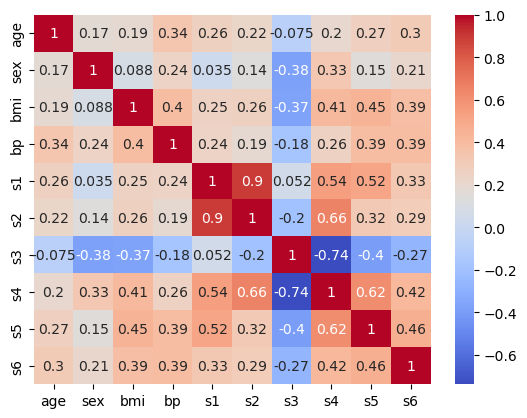

In [6]:
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

> **s1**, **s2** and **s4** stand out the most since their correlation is high

In [7]:
df.drop(columns=["age","sex","bmi","bp","s3","s5","s6"], inplace=True)

In [8]:
df.head()

,s1,s2,s4
0,-0.044223,-0.034821,-0.002592
1,-0.008449,-0.019163,-0.039493
2,-0.045599,-0.034194,-0.002592
3,0.012191,0.024991,0.034309
4,0.003935,0.015596,-0.002592


- Running the PCA now

In [9]:
#first we need to scale the df
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [16]:
#running the pca 
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

In [19]:
explained_variance = pca.explained_variance_ratio_

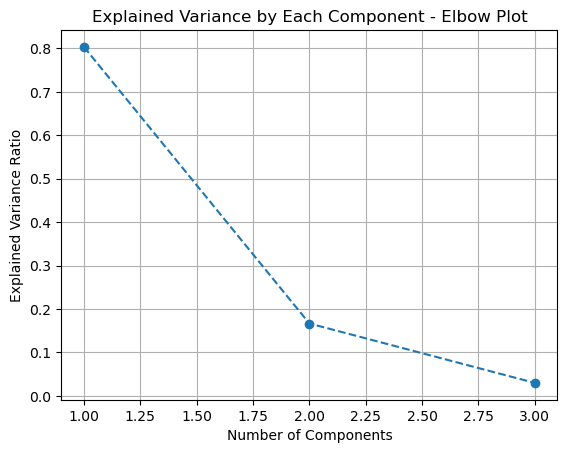

In [22]:

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Elbow Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

>*From the plot, it seems that we only need 2 components*

In [23]:
pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(data_scaled)

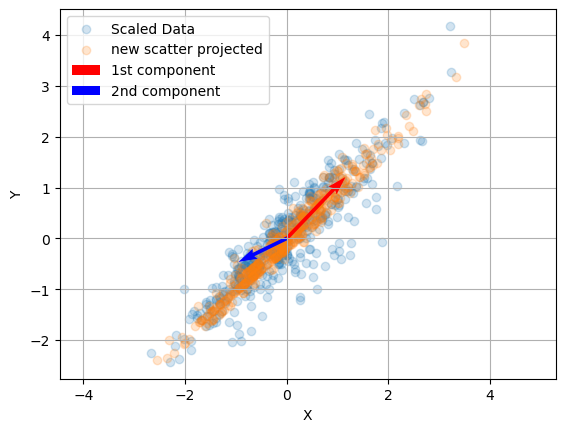

In [35]:

#plt.scatter(data_pca2[:, 0], data_pca2[:, 1])

data_projected = pca2.inverse_transform(data_pca2)

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.2 ,label='Scaled Data')
plt.scatter(data_projected[:, 0], data_projected[:, 1], alpha = 0.2, label='new scatter projected')

plt.quiver(0, 0, pca2.components_[0, 0], pca2.components_[0, 1], scale=5, color='r', label='1st component')
plt.quiver(0, 0, pca2.components_[1, 0], pca2.components_[1, 1], scale=5, color='b', label='2nd component')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
